# Movies recomendation system

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Reading movie data from rating.csv file

In [2]:
rat = pd.read_csv("ratings.csv")

In [3]:
rating = pd.DataFrame(rat,columns=["userId","movieId","rating","timestamp"])

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


##### Reading movies name and merge it through their movieId and title of movie

In [5]:
movie = pd.read_csv("movies.csv")

In [6]:
movie = movie.drop("genres",axis=1)


In [7]:
df = pd.merge(rating,movie,on="movieId")

In [8]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


# Sorting movies with the best rating


In [9]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

## Movies which are rated by most of the users

In [10]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

##### Making new dataframe which having title , mean rating  and number of ratings given by users of each movies.

###### Note: This is perform to filter the data from those movies which are mean rated 5 by 1 user and 4.5 mean rated by 350 users. In  both of them best one is rated movie 4.5 rather than 1 , so we filter it out.

In [11]:
rating = pd.DataFrame(df.groupby("title")["rating"].mean())

In [12]:
rating.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [13]:
rating["no. of rating"] = df.groupby("title")["rating"].count()

In [14]:
rating.head()

,rating,no. of rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


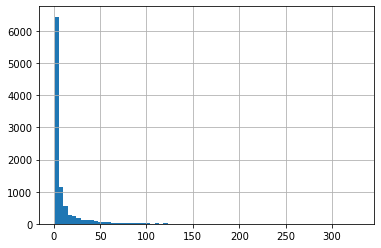

In [15]:
rating["no. of rating"].hist(bins=70)

##### The below graph shows that 3 to 4.3 ratings are given to most of the movies.

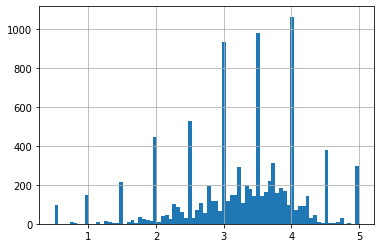

In [16]:
rating["rating"].hist(bins=80)

In [17]:
rating.sort_values("no. of rating",ascending=False)

,rating,no. of rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


##### Building a matrix of movies title vs userid who rated or not

In [18]:
moviemat = df.pivot_table(index="userId",columns="title",values="rating")

In [23]:
moviemat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9719 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
dtypes: float64(9719)
memory usage: 45.2 MB


In [19]:
moviemat.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [20]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


##### Now let's suppose some user interested in movie Forest Gump(1994) now recommened system recomends list of movies which are liked by the same users who liked forest Gump

In [25]:
forest_gump_rating = moviemat["Forrest Gump (1994)"]
Shawshank_Redemption = moviemat["Shawshank Redemption, The (1994)"]

In [26]:
forest_gump_rating.head(110)

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
106    NaN
107    NaN
108    NaN
109    5.0
110    NaN
Name: Forrest Gump (1994), Length: 110, dtype: float64

In [27]:
Shawshank_Redemption.head()

userId
1    NaN
2    3.0
3    NaN
4    NaN
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

##### Now this is correlation with the similar movies which clicked by user

In [28]:
similar_to_forest = moviemat.corrwith(forest_gump_rating)
similar_to_Shawshank = moviemat.corrwith(Shawshank_Redemption)

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [37]:
similar_to_forest

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.011189
xXx (2002)                                   0.306817
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                        0.449692
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [38]:
similar_to_Shawshank

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.047590
xXx (2002)                                   0.301531
xXx: State of the Union (2005)               0.975900
¡Three Amigos! (1986)                        0.048287
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [31]:
corr_Shawshank = pd.DataFrame(similar_to_Shawshank,columns=["Correlation"])
corr_Shawshank.dropna(inplace = True)
corr_forest = pd.DataFrame(similar_to_forest,columns=["Correlation"])
corr_forest.dropna(inplace= True)

In [30]:
corr_Shawshank.sort_values("Correlation",ascending=False).head()

,Correlation
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0


In [32]:
corr_forest.sort_values("Correlation",ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


## filtering movies with greater than 100 ratings

In [33]:
corr_Shawshank = corr_Shawshank.join(rating["no. of rating"])
corr_forest = corr_forest.join(rating["no. of rating"])

In [34]:
corr_Shawshank.sort_values("no. of rating",ascending=False).head()

,Correlation,no. of rating
title,,
Forrest Gump (1994),0.297438,329
"Shawshank Redemption, The (1994)",1.000000,317
Pulp Fiction (1994),0.131893,307
"Silence of the Lambs, The (1991)",0.211321,279
"Matrix, The (1999)",0.284825,278


In [35]:
corr_forest.sort_values("no. of rating",ascending = False).head()

,Correlation,no. of rating
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.297438,317
Pulp Fiction (1994),0.077001,307
"Silence of the Lambs, The (1991)",0.221777,279
"Matrix, The (1999)",0.280199,278


In [36]:
corr_Shawshank[corr_Shawshank["no. of rating"]>100].sort_values("Correlation",ascending = False).head()

,Correlation,no. of rating
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Four Weddings and a Funeral (1994),0.446212,103
Schindler's List (1993),0.402202,220
"Usual Suspects, The (1995)",0.394294,204
Ocean's Eleven (2001),0.391546,119


In [37]:
corr_forest[corr_forest["no. of rating"]>100].sort_values("no. of rating",ascending=False).head()

,Correlation,no. of rating
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.297438,317
Pulp Fiction (1994),0.077001,307
"Silence of the Lambs, The (1991)",0.221777,279
"Matrix, The (1999)",0.280199,278


###### Now the above list of movies are similar movies to Shawshank Redemption and Forest Gump. These are recommended by the sytem.

###### Thankyou